In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np,pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
data_table=pd.read_csv("/content/drive/MyDrive/Datasets/Lineardata_train.csv")

In [ ]:
data=data_table.to_numpy()

In [ ]:
y_train=data[:,0]
y=y_train[:40000]
y_cv=y_train[40000:]

In [ ]:
x_train=data[:,1:]

In [ ]:
def z_score_normalization(array):
  mean=np.mean(array,axis=0)
  std=np.std(array,axis=0)
  array_norm=array
  for i in range(np.shape(array)[0]):
    array_norm[i,:]=(array_norm[i,:]-mean)/std
  return(array_norm)

In [ ]:
x_train=z_score_normalization(x_train)
x=x_train[:40000,:]
x_cv=x_train[40000:,:]

In [ ]:
w=np.ones((20,))

In [ ]:
b=0

In [ ]:
def cost_function(x,y,w,b):
  j=(np.sum((np.dot(x,w)+b-y)**2))/(2*x.shape[0])
  return(j)

In [ ]:
def gradient(x,y,w,b):
  t=(np.dot(x,w)+b-y)
  m,n=np.shape(x)
  dj_db=np.sum(t)/m
  dj_dw=np.zeros((n,))
  for i in range(n):
    dj_dw[i]=(np.sum(np.dot(x[:,i],t)))/m
  return(dj_dw,dj_db)

In [ ]:
def gradient_descent(x,y,w,b,alpha,iterations):
  m,n=np.shape(x)
  j=cost_function(x,y,w,b)
  print("Iterations: ",0,"      Cost Function: ",j)
  cf=np.zeros(iterations//100)
  itera=np.zeros(iterations//100)
  a=0
  for i in range(1,iterations+1):
    dj_dw,dj_db=gradient(x,y,w,b)
    w=w-(alpha*dj_dw)
    b=b-(alpha*dj_db)
    j=cost_function(x,y,w,b)
    if(i%100==0):
      print("Iterations: ",i,"    Cost Function: ",j)
      cf[a]=j
      itera[a]=i
      a+=1
  print("\nTotal Iterations taken: ",iterations)
  print("Cost Function: ",j)
  return(w,b,cf,itera)

In [ ]:
w,b,cf,itera=gradient_descent(x,y,w,b,5.0e-2,1000)

Iterations:  0       Cost Function:  65731363.08148191
Iterations:  100     Cost Function:  2212.0103987896346
Iterations:  200     Cost Function:  0.082760559161131
Iterations:  300     Cost Function:  0.005051266296927173
Iterations:  400     Cost Function:  0.005048418180736616
Iterations:  500     Cost Function:  0.0050484180720748555
Iterations:  600     Cost Function:  0.005048418072069397
Iterations:  700     Cost Function:  0.005048418072070541
Iterations:  800     Cost Function:  0.005048418072070106
Iterations:  900     Cost Function:  0.005048418072070106
Iterations:  1000     Cost Function:  0.005048418072070106

Total Iterations taken:  1000
Cost Function:  0.005048418072070106


In [ ]:
w

array([2.20194859e+01, 3.31498881e+01, 9.95556536e+00, 6.05402494e+00,
       1.75469027e+02, 3.29905039e+02, 2.53981177e+02, 9.02616670e+02,
       4.35807984e+02, 8.38966333e+01, 1.21226556e+02, 1.60618568e+03,
       1.67667921e+03, 1.31341726e+03, 5.99392456e+02, 1.05495142e+04,
       5.04448547e+02, 6.78421997e+02, 3.16485238e+03, 2.30428201e+02])

In [ ]:
b

60.36341837062838

In [ ]:
y_hat=np.zeros((40000,))

In [ ]:
for i in range(40000):
  y_hat[i]=np.dot(w,x[i,:])+b

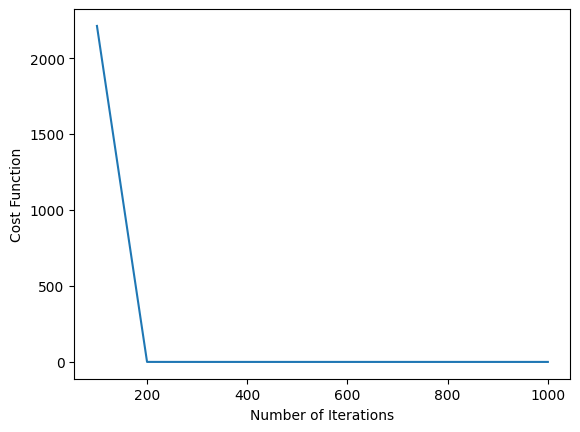

In [ ]:
plt.plot(itera,cf)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Function")
plt.show()

In [ ]:
y_avg=np.average(y)
r2=0
num=0
dem=0
m=np.shape(y)[0]
for i in range(m):
  num+=(y_hat[i]-y[i])**2
  dem+=(y_avg-y[i])**2
r2=1-(num/dem)
print(r2)

0.9999999999232193


In [ ]:
y_cv_hat=np.zeros((10000,))
for i in range(10000):
  y_cv_hat[i]=((np.dot(w,x_cv[i,:]))+b)

In [ ]:
y_cv_avg=np.average(y_cv)
r2=0
num=0
dem=0
m=np.shape(y_cv)[0]
for i in range(m):
  num+=(y_cv_hat[i]-y_cv[i])**2
  dem+=(y_cv_avg-y_cv[i])**2
r2=1-(num/dem)
print(r2)
print("As the r2 value for train an cross validation set is very similar hence we can finalize this Machine Learning model.")

0.9999999999216167
As the r2 value for train an cross validation set is very similar hence we can finalize this Machine Learning model.


In [ ]:
#now use test data
data_table_test=pd.read_csv("/content/drive/MyDrive/Datasets/Lineardata_test.csv")
data_test=data_table_test.to_numpy()
x_test=data_test[:,1:]
x_test=z_score_normalization(x_test)

In [ ]:
y_test=np.zeros((10000,))
for i in range(10000):
  y_test[i]=np.dot(w,x_test[i,:])+b

In [ ]:
y_final=pd.DataFrame(y_test)

In [ ]:
y_final.to_csv("Result_linear_test.csv")
from google.colab import files
files.download('Result_linear_test.csv')